  # Pitchfork Scores Analysis

Here, I explore and visualize Pitchfork Magazine's scores using the dataset obtained from Kaggle in SQLite format. The .csv version presented here has been pre-processed through R.  

* **Part 1: Data Processing**: understanding the dataset and merging the datasets.

    -  Packages and Data Upload
    -  Understanding the dataset
    -  Dropping unnecessary variables
    -  Cleaning NULL values
* **Part 2: Data Visualization**: Extracting insights by visualizing relationships between variables.
* **Part 3: Data Extraction**: Extracting particular portions of the data (such as, which albums got perfect scores?)

# Part 1: Data Processing

In this part, I process the information across the entirety of the dataset. I begin by understanding the dataset and its contents on a high level by implementing seaborn's heatmap capacities, and cleaning where necessary. 

**Packages and Data Upload**

In [88]:
# Numerical packages

import pandas as pd
import numpy as np

In [89]:
# Plotting packages

import matplotlib.pyplot as plt
import seaborn as sns

In [90]:
# Inline call

%matplotlib inline

In [91]:
# Data Upload

pitchfork_data = pd.read_csv('pitchfork_scores.csv')

**Understanding the dataset**

In [92]:
# Understanding the content of each column in the dataset

pitchfork_data.head()

,Unnamed: 0,reviewid,title,artist,score,best_new_music,author_type,pub_date,pub_day,pub_month,pub_year,label,genre,year
0,1,22703,mezzanine,massive attack,9.3,0,contributor,2017-01-08,8,1,2017,virgin,electronic,1998.0
1,2,22721,prelapsarian,krallice,7.9,0,contributor,2017-01-07,7,1,2017,hathenter,metal,2016.0
2,3,22659,all of them naturals,uranium club,7.3,0,contributor,2017-01-07,7,1,2017,fashionable idiots,rock,2016.0
3,4,22659,all of them naturals,uranium club,7.3,0,contributor,2017-01-07,7,1,2017,static shock,rock,2016.0
4,5,22661,first songs,"kleenex, liliput",9.0,1,associate reviews editor,2017-01-06,6,1,2017,kill rock stars,rock,2016.0


We don't need the following columns:

* Column 1 (which used to be index in the original dataset)
* pub_date (since we already have those columns broken down for us)

In [93]:
# Dropping the required column:

pitchfork_data = pitchfork_data.drop(['Unnamed: 0', 'pub_date'], axis=1)

In [94]:
# We will also drop any duplicates of reviews, since review_ids can be distributed across different labels.

pitchfork_data = pitchfork_data.drop_duplicates(subset = 'reviewid', keep = 'first')

In [95]:
# Checking the dataset again

pitchfork_data.head()

,reviewid,title,artist,score,best_new_music,author_type,pub_day,pub_month,pub_year,label,genre,year
0,22703,mezzanine,massive attack,9.3,0,contributor,8,1,2017,virgin,electronic,1998.0
1,22721,prelapsarian,krallice,7.9,0,contributor,7,1,2017,hathenter,metal,2016.0
2,22659,all of them naturals,uranium club,7.3,0,contributor,7,1,2017,fashionable idiots,rock,2016.0
4,22661,first songs,"kleenex, liliput",9.0,1,associate reviews editor,6,1,2017,kill rock stars,rock,2016.0
6,22725,new start,taso,8.1,0,tracks coordinator,6,1,2017,teklife,electronic,2016.0


In [96]:
# Understanding the type of data in each column in the dataset

pitchfork_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18389 entries, 0 to 25921
Data columns (total 12 columns):
reviewid          18389 non-null int64
title             18387 non-null object
artist            18387 non-null object
score             18389 non-null float64
best_new_music    18389 non-null int64
author_type       14485 non-null object
pub_day           18389 non-null int64
pub_month         18389 non-null int64
pub_year          18389 non-null int64
label             18342 non-null object
genre             16024 non-null object
year              17983 non-null float64
dtypes: float64(2), int64(5), object(5)
memory usage: 1.8+ MB


*Note*: This dataset has 25,992 entries. 

We should transform the pub_day, pub_month, and pub_year variables into strings, since we will be interested in exploring score distributions across each of these as a specific category. Additionally, we need to transform the year variable into object type. 

In [97]:
# Changing column types from int and float to object

pitchfork_data[['pub_day', 'pub_month', 'pub_year', 'year']] = pitchfork_data[['pub_day', 'pub_month', 'pub_year', 'year']].astype('object')

In [98]:
# Checking again the type of data in each column in the dataset

pitchfork_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18389 entries, 0 to 25921
Data columns (total 12 columns):
reviewid          18389 non-null int64
title             18387 non-null object
artist            18387 non-null object
score             18389 non-null float64
best_new_music    18389 non-null int64
author_type       14485 non-null object
pub_day           18389 non-null object
pub_month         18389 non-null object
pub_year          18389 non-null object
label             18342 non-null object
genre             16024 non-null object
year              17983 non-null object
dtypes: float64(1), int64(2), object(9)
memory usage: 1.8+ MB


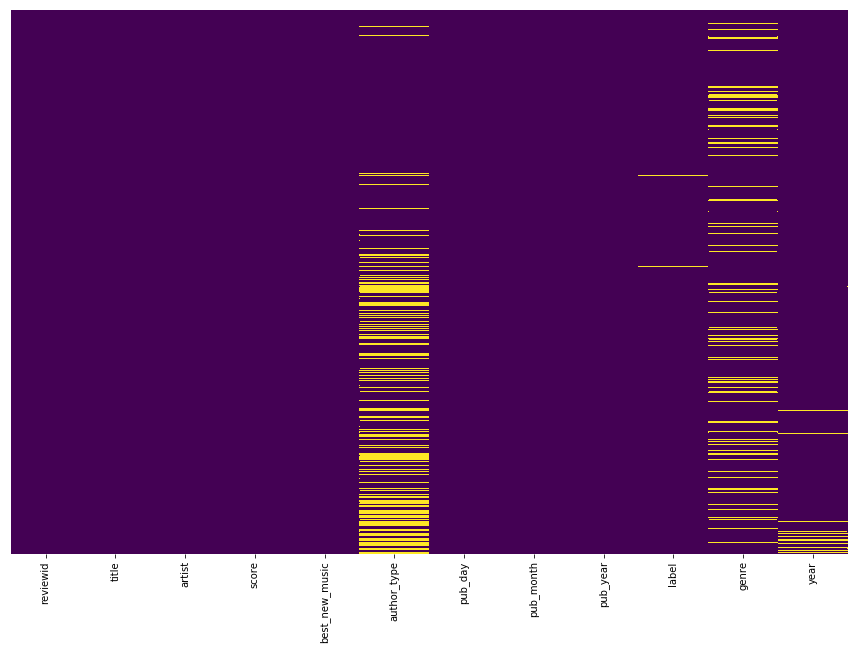

In [99]:
# Checking for presence of null values in each column, where purple = data and yellow = NULL

fig, ax = plt.subplots(figsize = (15,10))
sns.heatmap(pitchfork_data.isnull(), yticklabels=False, cbar=False, cmap='viridis')

*Interpretation*: The author_type variable is unfortunately rife with null values, so it doesn't make much sense to contain it in the dataset. The *genre* variable also has numerous null values, but we can create an 'unknown' category for genre to avoid biased imputation methods. Finally, *year*, *label*, and *title* variables have some null values that we might need to drop. Let's start from the simpler ones. 

In [100]:
# Dropping the author_type column

pitchfork_data = pitchfork_data.drop('author_type', axis=1)

In [101]:
# Import float division capability

from __future__ import division

In [102]:
# Let's check how much of the dataset null values occupy for the year variable:

round(len(pitchfork_data[pitchfork_data['year'].isna() == 1])*100/len(pitchfork_data['year']), 3) 

2.208

2.3% of data points in the *year* variable are null, which means we can safely drop them, as it won't affect our analysis that much. 

In [103]:
# Let's check how much of the dataset null values occupy for the label variable:

round(len(pitchfork_data[pitchfork_data['label'].isna() == 1])*100/len(pitchfork_data['label']), 3) 

0.256

0.2% of data points in the *label* variable are null, which means we can safely drop them, as it won't affect our analysis that much. 

In [104]:
# Let's check how much of the dataset null values occupy for the title variable:

round(len(pitchfork_data[pitchfork_data['title'].isna() == 1])*100/len(pitchfork_data['title']), 3) 

0.011

0.015% of data points in the *title* variable are null, which means we can safely drop them, as it won't affect our analysis that much. 

In [105]:
# Dropping all the above mentioned rows

pitchfork_data.dropna(subset=['year', 'label', 'title'], inplace=True)

In [106]:
# Let's replace genre NULL values with 'Unknown' category

pitchfork_data['genre'] = pitchfork_data.genre.replace(np.nan, 'unknown', regex=True)

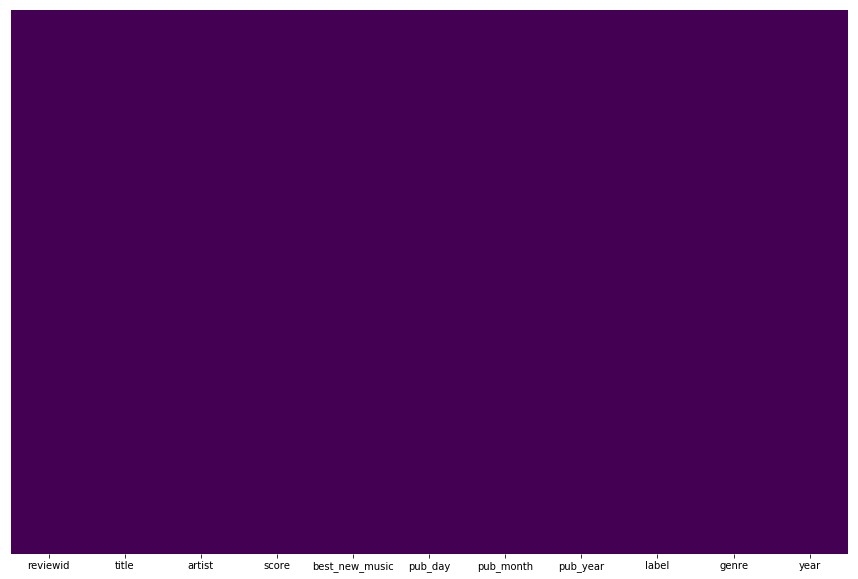

In [107]:
# Checking for presence of null values in each column, where purple = data and yellow = NULL

fig, ax = plt.subplots(figsize = (15,10))
sns.heatmap(pitchfork_data.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [108]:
# Pre-Final check: did we get rid of all NULL values? If any columns are TRUE, we still have NULL values. 

pd.isnull(pitchfork_data).sum() > 0

reviewid          False
title             False
artist             True
score             False
best_new_music    False
pub_day           False
pub_month         False
pub_year          False
label             False
genre             False
year              False
dtype: bool

In [109]:
# Let's check how much of the dataset null values occupy for the artist variable:

round(len(pitchfork_data[pitchfork_data['artist'].isna() == 1])*100/len(pitchfork_data['artist']), 3) 

0.006

0.004% of the cleaned dataset, which means even less of the original dataset. 

In [110]:
# Let's now drop those as well 

pitchfork_data.dropna(subset=['artist'], inplace=True)

In [111]:
# Final check: did we get rid of all NULL values? If any columns are TRUE, we still have NULL values. 

pd.isnull(pitchfork_data).sum() > 0

reviewid          False
title             False
artist            False
score             False
best_new_music    False
pub_day           False
pub_month         False
pub_year          False
label             False
genre             False
year              False
dtype: bool

In [112]:
# For easiness, let's rename the variable and reset indices

df = pitchfork_data.reset_index()

In [113]:
# We need to drop the newly-created index variable

df.drop(axis=1, columns=['index'], inplace=True)

In [114]:
df.head()

,reviewid,title,artist,score,best_new_music,pub_day,pub_month,pub_year,label,genre,year
0,22703,mezzanine,massive attack,9.3,0,8,1,2017,virgin,electronic,1998
1,22721,prelapsarian,krallice,7.9,0,7,1,2017,hathenter,metal,2016
2,22659,all of them naturals,uranium club,7.3,0,7,1,2017,fashionable idiots,rock,2016
3,22661,first songs,"kleenex, liliput",9.0,1,6,1,2017,kill rock stars,rock,2016
4,22725,new start,taso,8.1,0,6,1,2017,teklife,electronic,2016


# Part 2: Data Visualization

**Year-based analysis**

Text(0.5,1,'Number of Albums per Year of Publication (Chronological)')

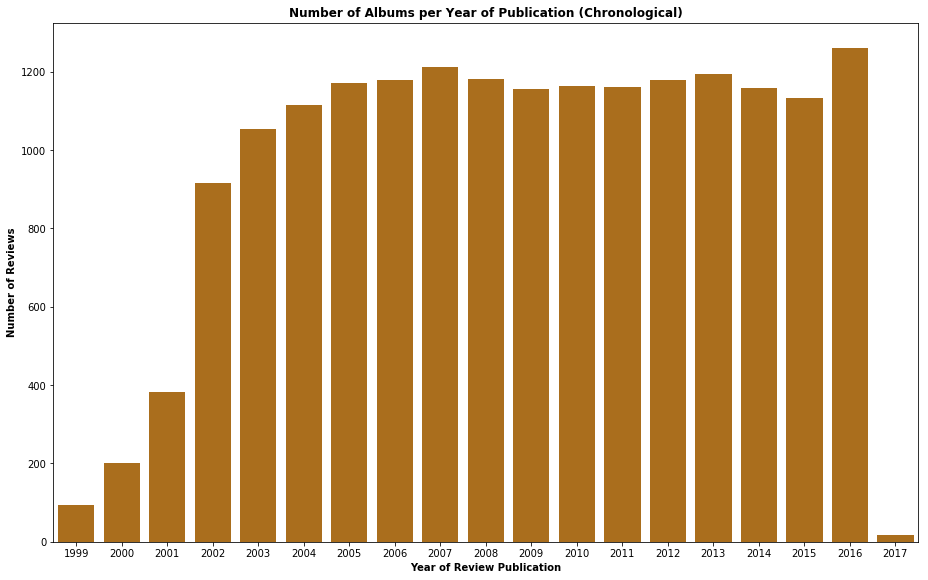

In [115]:
# Let's see how many albums were reviewed per each year of review publication:


# Ordered by year 

plt.figure(figsize=(13,8))
sns.countplot(x='pub_year', data=df, color='#C17205')
plt.tight_layout()
plt.xlabel('Year of Review Publication', weight = 'bold')
plt.ylabel('Number of Reviews', weight = 'bold')
plt.title('Number of Albums per Year of Publication (Chronological)', weight = 'bold')

If the dataset has been built by correct scraping, we can see that Pitchfork picked up in year 2002, rising to an approximate average number of 1600 reviews per year, as of 2004. One exception to this is year 2015, which can be due to trends in the music industry. 2017 is an outlier here, as the data was likely acquired in that year, when there was not enough reviews yet. So, if we look at the range from 2004 - 2016, the distribution seems fairly uniform. 

Text(0.5,1,'Number of Albums per Year of Album Release (Chronological)')

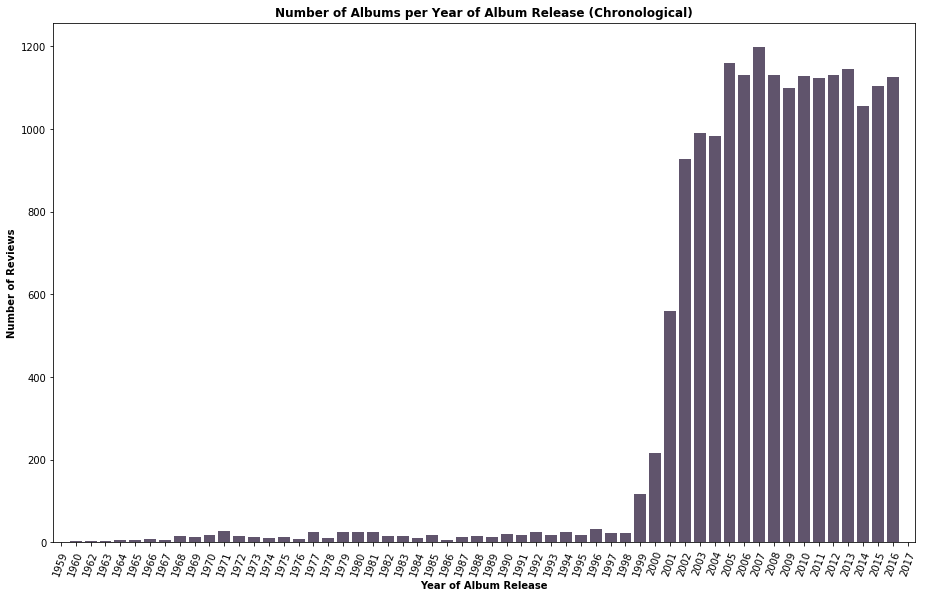

In [116]:
# Let's see how these plots look like for year of album release:

# Ordered by year 

plt.figure(figsize=(13,8))
sns.countplot(x=df['year'].astype(int), data=df, color='#605070')
# casting as integer here since xticks plots numbers as floats
plt.tight_layout()
plt.xticks(rotation=70)
plt.xlabel('Year of Album Release', weight = 'bold')
plt.ylabel('Number of Reviews', weight = 'bold')
plt.title('Number of Albums per Year of Album Release (Chronological)', weight = 'bold')

We see a different distribution year: low-frequency counts for years before 1999, when Pitchfork's first publications are recorded in this dataset. This is because Pitchfork often reviews older albums, either because they got re-released or because an author offers a fresher perspective on iconic albums.

Text(80.75,0.5,'Number of Reviews')

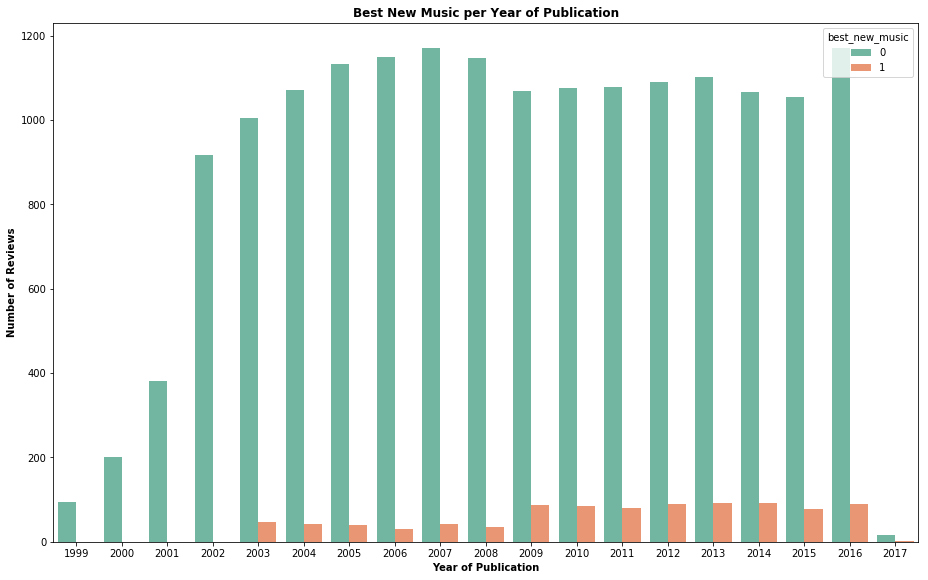

In [117]:
# Let's see how the distribution changes for 'best new music' across years for Pitchfork

plt.figure(figsize=(13,8))
sns.countplot(x='pub_year', hue='best_new_music', data=df, palette='Set2')
plt.tight_layout()
plt.title('Best New Music per Year of Publication', weight = 'bold')
plt.xlabel('Year of Publication', weight = 'bold')
plt.ylabel('Number of Reviews', weight = 'bold')

We can see that Pitchfork introduced the concept in 2003, and that only a small percentage of albums each year is classified as 'Best New Music.' Interestingly, this number picked up in 2009 and onward.

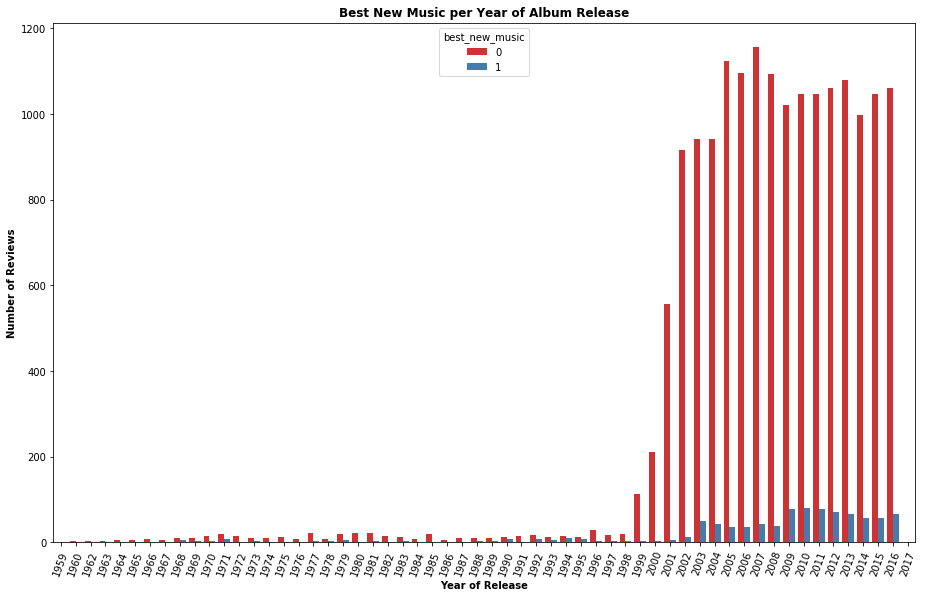

In [118]:
# Now, let's see how the distribution changes for 'best new music' across years of album release

plt.figure(figsize=(13,8))
sns.countplot(x=df['year'].astype(int), hue='best_new_music', data=df, palette='Set1')
plt.tight_layout()
plt.title('Best New Music per Year of Album Release', weight = 'bold')
plt.xlabel('Year of Release', weight = 'bold')
plt.ylabel('Number of Reviews', weight = 'bold')
plt.xticks(rotation=70)
plt.show()

The trend generally is consistent, even when looking at year of release instead of year of publication, though we can notice that a fair number of pre-Pitchfork era albums have been classified as best new music. These were likely re-releases of older or iconic albums. 

**Genre-based analysis**

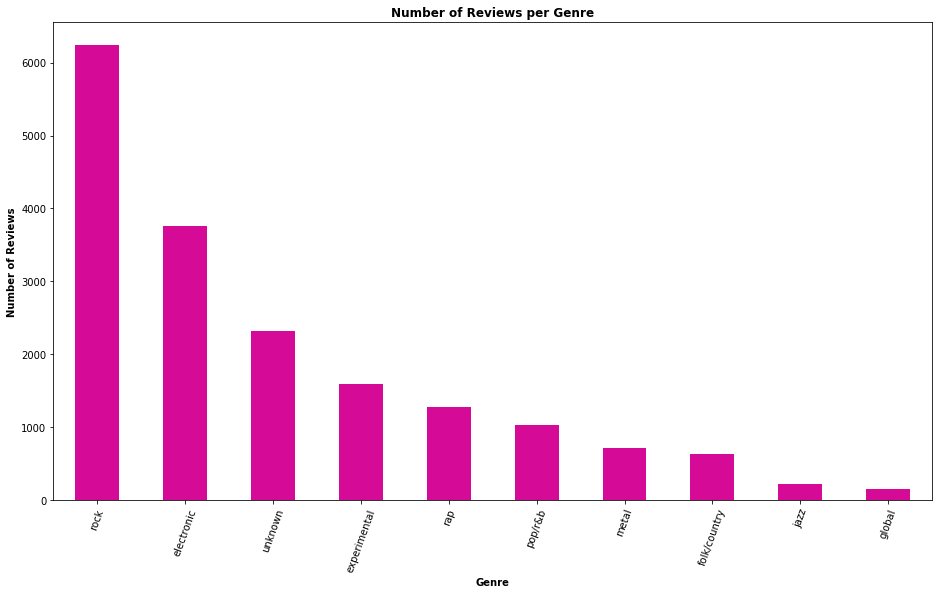

In [119]:
# Let's see which genres generally tend to be Pitchfork's main focus. 

# Ordered by genre

plt.figure(figsize=(13,8))
df['genre'].value_counts().plot(kind='bar', color = '#D50A97')
plt.tight_layout()
plt.xlabel('Genre', weight = 'bold')
plt.ylabel('Number of Reviews', weight = 'bold')
plt.title('Number of Reviews per Genre', weight = 'bold')
plt.xticks(rotation = 70)
plt.show()

Rock music is Pitchfork's primary editorial focus, followed by electronic and experimental. Since the missing genre data has been imputated using 'unknown' label, there is a solid portion of the reviews belonging to this category. Had the data been imputated differently, the unknown category would have likely been distributed over these three genres. 

**Label-based analysis**

In [120]:
# Let's see if there are any particular labels that Pitchfork tends to review albums from. 

# First, let's see how many labels there are in this dataset. 

len(df['label'].unique())

3338

That's too many labels, so let's only pick the top 20. 

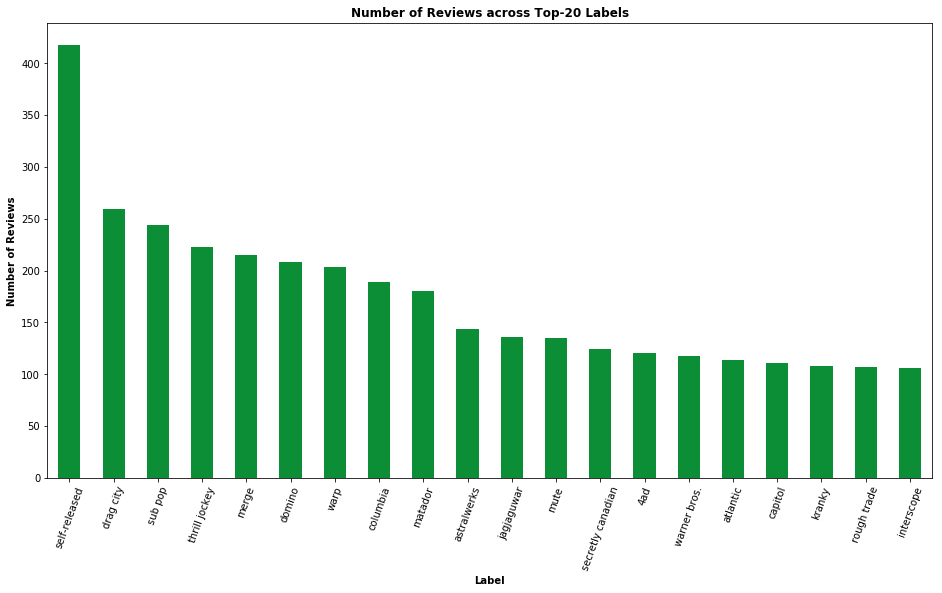

In [121]:
plt.figure(figsize=(13,8))
df['label'].value_counts()[0:20].plot(kind='bar', color = '#0B8E36')
plt.tight_layout()
plt.xlabel('Label', weight = 'bold')
plt.ylabel('Number of Reviews', weight = 'bold')
plt.title('Number of Reviews across Top-20 Labels', weight = 'bold')
plt.xticks(rotation = 70)
plt.show()

Interestingly, this shows that Pitchfork does tend to review a fair number of self-released records, thus indicating interest and focus on independent/indie music. 

**Score-based analysis**

Text(0,0.5,'Number of Reviews')

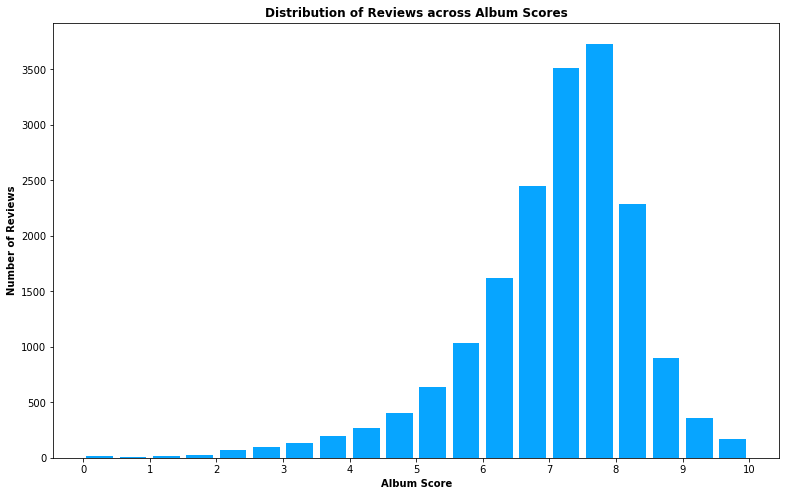

In [122]:
# Let's see the distribution of Pitchfork scores

fig1, ax1 = plt.subplots(figsize = (13,8))
ax1.hist(df.score, bins = 20, range = (0,10), rwidth  = 0.8, color='#07A5FF')
plt.xticks([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
ax1.set_title("Distribution of Reviews across Album Scores", weight = 'bold')
ax1.set_xlabel("Album Score", weight = 'bold')
ax1.set_ylabel("Number of Reviews", weight = 'bold')

We can see that the distribution of scores is negatively skewed, with most reviews assigning a score between 7 and 8. As an interesting side note, this is fairly similar to my distribution of album scores presented in the music-score-analysis repository. 

## Part 3: Data Extraction

In [127]:
# Which albums had perfect scores?

df[df['score'] == 10]

,reviewid,title,artist,score,best_new_music,pub_day,pub_month,pub_year,label,genre,year
191,22374,metal box,public image ltd,10.0,1,1,11,2016,universal,rock,1979
200,22485,blood on the tracks,bob dylan,10.0,0,30,10,2016,columbia,rock,1975
354,22061,another green world,brian eno,10.0,0,18,9,2016,island,experimental,1975
450,22174,songs in the key of life,stevie wonder,10.0,0,21,8,2016,motown,pop/r&b,1976
529,22159,in concert,nina simone,10.0,0,30,7,2016,philips,jazz,1964
652,22053,tonight's the night,neil young,10.0,0,26,6,2016,reprise,rock,1975
704,21964,hounds of love,kate bush,10.0,0,12,6,2016,emi,pop/r&b,1985
854,21845,"sign ""o"" the times",prince,10.0,0,30,4,2016,paisley park,pop/r&b,1987
855,21842,1999,prince,10.0,0,30,4,2016,warner bros.,pop/r&b,1982
858,21841,purple rain,"prince, the revolution",10.0,0,29,4,2016,warner bros.,pop/r&b,1984


In [131]:
# How many albums got perfect scores?

round(len(df[df['score'] == 10])/len(df),3)*100

0.4

Only 0.4% of albums!

In my own analysis of music-listening behavior, I discovered that top-listening years were 2009, 2011, and 2013 for me. I
wanted to see which albums were best-new music for Pitchfork in those years. 

In [150]:
# 2009 
pd.options.display.max_rows = 100
df_2009 = df[df['year'] == 2009]
df_2009[df_2009['best_new_music'] == 1]

,reviewid,title,artist,score,best_new_music,pub_day,pub_month,pub_year,label,genre,year
3047,19402,midtown 120 blues,dj sprinkles,8.5,1,2,6,2014,comatonse,unknown,2009
4725,17504,rifts,oneohtrix point never,8.7,1,11,1,2013,mexican summer,experimental,2009
8059,13984,ladies and gentlemen we are floating in space ...,spiritualized,10.0,1,2,3,2010,atp,experimental,2009
8106,13910,the minimal wave tapes: vol. 1,various artists,8.0,1,17,2,2010,stones throw,unknown,2009
8174,13878,irm,charlotte gainsbourg,8.4,1,28,1,2010,because,pop/r&b,2009
8197,13820,"francophonic, vol. 2: 1980-1989",franco & le tout puissant ok jazz,8.7,1,22,1,2010,sterns africa,unknown,2009
8282,13762,elvis 75: good rockin' tonight,elvis presley,9.0,1,8,12,2009,legacy,rock,2009
8289,13678,new york-addis-london: the story of ethio jazz...,mulatu astatke,9.0,1,7,12,2009,strut,jazz,2009
8307,13742,the catalogue,kraftwerk,9.5,1,1,12,2009,astralwerks,electronic,2009
8317,13739,fall be kind ep,animal collective,8.9,1,25,11,2009,domino,experimental,2009


Pitchfork also had Bat for Lashes - Two Suns and Fever Ray - Fever Ray in their list of best albums for 2009. 

In [151]:
# 2011 

df_2011 = df[df['year'] == 2011]
df_2011[df_2011['best_new_music'] == 1]

,reviewid,title,artist,score,best_new_music,pub_day,pub_month,pub_year,label,genre,year
5900,16175,journey of the deep sea dweller i,drexciya,8.7,1,13,1,2012,clone,electronic,2011
5919,16160,box set,neutral milk hotel,9.5,1,9,1,2012,neutral milk hotel,rock,2011
5949,16115,hdcd box set,this mortal coil,9.0,1,8,12,2011,4ad,rock,2011
5989,16059,gish [deluxe edition],the smashing pumpkins,8.3,1,28,11,2011,emi,rock,2011
5995,16070,singles: 2007-2010,ty segall,8.3,1,23,11,2011,goner,rock,2011
5999,16062,sepalcure,sepalcure,8.4,1,22,11,2011,hotflush,electronic,2011
6004,16067,50 words for snow,kate bush,8.5,1,21,11,2011,anti-,pop/r&b,2011
6024,16032,"part lies, part heart, part truth, part garbag...",r.e.m.,9.4,1,15,11,2011,irs,rock,2011
6029,16039,take care,drake,8.6,1,14,11,2011,cash money,rap,2011
6034,16031,replica,oneohtrix point never,8.8,1,11,11,2011,mexican summer,experimental,2011


PJ Harvey's Let England Shake nicely made the list, which I also liked a lot. Good to see St. Vincent's Strange Mercy in there as well. 

In [152]:
# 2013 

df_2013 = df[df['year'] == 2013]
df_2013[df_2013['best_new_music'] == 1]

,reviewid,title,artist,score,best_new_music,pub_day,pub_month,pub_year,label,genre,year
3565,18821,beyonc,beyonc,8.8,1,6,1,2014,columbia,pop/r&b,2013
3570,18820,rival dealer ep,burial,9.0,1,13,12,2013,hyperdub,electronic,2013
3631,18658,purple snow: forecasting the minneapolis sound,various artists,8.4,1,25,11,2013,numero group,unknown,2013
3635,18703,"the rise & fall of paramount records, volume o...",various artists,9.2,1,22,11,2013,third man,unknown,2013
3650,18779,government plates,death grips,8.4,1,19,11,2013,self-released,experimental,2013
3667,18655,i am the center: private issue new age music i...,various artists,8.3,1,14,11,2013,light in the attic,unknown,2013
3670,18736,cupid deluxe,blood orange,8.5,1,13,11,2013,domino,pop/r&b,2013
3688,18732,who is william onyeabor?,william onyeabor,8.6,1,8,11,2013,luaka bop,global,2013
3706,18603,the regal years: 1997-2004,the beta band,8.4,1,4,11,2013,parlophone,rock,2013
3710,18679,nonfiction,the range,8.2,1,31,10,2013,donky pitch,electronic,2013


Several nice ones in here as well, including Janelle Monae, Julia Holter, Rhye, and Disclosure, though I strongly disagree on The Knife's Shaking the Habitual. 